In [32]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

np.random.seed(42)

## Loading and preparing data

### Wisconsin Breast Cancer

In [15]:
# loading data
cancer_data = pd.read_csv("data/breast-cancer-wisconsin.data", header = None)

# missing values imputation
cancer_data = cancer_data.replace("?", np.NaN)
median_imputer = SimpleImputer(missing_values=np.NaN, strategy="median").fit(cancer_data)
cancer_data = pd.DataFrame(median_imputer.transform(cancer_data), columns = cancer_data.columns)

# splitting 
cancer_X = cancer_data.iloc[:, :-1]
cancer_y = cancer_data.iloc[:, -1]

# transforming y
cancer_y = cancer_y.replace(2, 1).replace(4, -1)

# all columns are numeric
assert(np.all(cancer_X.apply(lambda col: pd.api.types.is_numeric_dtype(col))))

### Ionosphere

In [16]:
# loading data
iono_data = pd.read_csv("data/ionosphere.data", header = None)

# no missing values
assert(np.all(iono_data != "?"))
assert(np.all(iono_data != np.NaN))
assert(np.all(iono_data != " "))
assert(np.all(iono_data != ""))

# splitting 
iono_X = iono_data.iloc[:, :-1]
iono_y = iono_data.iloc[:, -1]

# transforming y
iono_y = iono_y.replace("g", 1).replace("b", -1)

# all columns are numeric
assert(np.all(iono_X.apply(lambda col: pd.api.types.is_numeric_dtype(col))))

### Arrhythmia

In [17]:
# loading data
arryth_data =  pd.read_csv("data/arrhythmia.data", header = None)

# missing values imputation
arryth_data = arryth_data.replace("?", np.NaN)
median_imputer = SimpleImputer(missing_values=np.NaN, strategy="median").fit(arryth_data)
arryth_data = pd.DataFrame(median_imputer.transform(arryth_data), columns = arryth_data.columns)

# splitting 
arryth_X = arryth_data.iloc[:, :-1]
arryth_y = arryth_data.iloc[:, -1]

# transforming y
arryth_y = arryth_y.replace([3, 4, 5, 6, 8, 9, 14, 15], -1)
arryth_y = arryth_y.replace(arryth_y.unique()[arryth_y.unique()!=-1], 1) 

# all columns are numeric
assert(np.all(arryth_X.apply(lambda col: pd.api.types.is_numeric_dtype(col))))

### Satelitte

In [18]:
# loading data 
sat_data =  pd.read_csv("data/sat.trn", header = None, sep=" ")

# no missing values
assert(np.all(sat_data != "?"))
assert(np.all(sat_data != np.NaN))
assert(np.all(sat_data != " "))
assert(np.all(sat_data != ""))

# splitting 
sat_X = sat_data.iloc[:, :-1]
sat_y = sat_data.iloc[:, -1]

# transforming y
sat_y[sat_y.isin(list(sat_y.value_counts().index)[-3:])] = -1
sat_y = sat_y.replace(sat_y.unique()[sat_y.unique()!=-1], 1) 

# all columns are numeric
assert(np.all(sat_X.apply(lambda col: pd.api.types.is_numeric_dtype(col))))

### Shuttle

In [19]:
# loading data 
shut_data =  pd.read_csv("data/shuttle.trn", header = None, sep=" ")

# no missing values
assert(np.all(shut_data != "?"))
assert(np.all(shut_data != np.NaN))
assert(np.all(shut_data != " "))
assert(np.all(shut_data != ""))

# splitting 
shut_X= shut_data.iloc[:, :-1]
shut_y = shut_data.iloc[:, -1]

# transforming y
shut_y = shut_y.replace([2, 3, 5, 6, 7], -1)
shut_y = shut_y.replace(shut_y.unique()[shut_y.unique()!=-1], 1)

# all columns are numeric
assert(np.all(shut_X.apply(lambda col: pd.api.types.is_numeric_dtype(col))))

# Results definition

In [20]:
datasets = ["cancer", "ionosphere", "arrhythmia", "satelitte", "shuttle"]
X_data = [cancer_X, iono_X, arryth_X, sat_X, shut_X]
y_data = [cancer_y, iono_y, arryth_y, sat_y, shut_y]

algs = {
    "one-class SVM": OneClassSVM(nu=0.1, gamma=0.5),
    "isolation forest": IsolationForest(),
    "local outlier factor": LocalOutlierFactor(n_neighbors=2, novelty = True),
}

acc = pd.DataFrame(np.zeros((5, 3)), index = datasets, columns = algs.keys())
auc = pd.DataFrame(np.zeros((5, 3)), index = datasets, columns = algs.keys())
precision = pd.DataFrame(np.zeros((5, 3)), index = datasets, columns = algs.keys())
recall = pd.DataFrame(np.zeros((5, 3)), index = datasets, columns = algs.keys())
f1score = pd.DataFrame(np.zeros((5, 3)), index = datasets, columns = algs.keys())

scaler = MinMaxScaler() #  gives better performances and speeds up the process of outlier detection 

In [21]:
for i in range(len(datasets)):
    dataset = datasets[i]
    X = X_data[i]
    y = y_data[i]
    print(f"\tdataset: {dataset}")
    for alg_name, alg in algs.items():
        print(f"\t   alg: {alg_name}")
        X = scaler.fit_transform(X)
        alg.fit(X)
        y_hat = alg.predict(X)
        acc.at[dataset, alg_name] = accuracy_score(y, y_hat)
        auc.at[dataset, alg_name] = roc_auc_score(y, alg.decision_function(X))
        precision.at[dataset, alg_name] = precision_score(y, y_hat)
        recall.at[dataset, alg_name] = recall_score(y, y_hat)
        f1score.at[dataset, alg_name] = f1_score(y, y_hat)

	dataset: cancer
	   alg: one-class SVM
	   alg: isolation forest
	   alg: local outlier factor
	dataset: ionosphere
	   alg: one-class SVM
	   alg: isolation forest
	   alg: local outlier factor
	dataset: arrhythmia
	   alg: one-class SVM
	   alg: isolation forest
	   alg: local outlier factor
	dataset: satelitte
	   alg: one-class SVM
	   alg: isolation forest
	   alg: local outlier factor
	dataset: shuttle
	   alg: one-class SVM
	   alg: isolation forest
	   alg: local outlier factor


In [24]:
acc

,one-class SVM,isolation forest,local outlier factor
cancer,0.701001,0.952790,0.542203
ionosphere,0.732194,0.823362,0.766382
arrhythmia,0.734513,0.807522,0.794248
satelitte,0.718151,0.790530,0.693799
shuttle,0.936460,0.941448,0.894506


<AxesSubplot:ylabel='accuracy'>

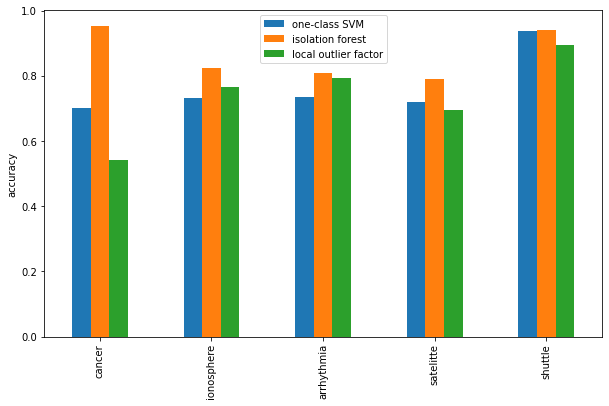

In [46]:
acc.plot.bar(figsize=(10,6), ylabel="accuracy")

In [25]:
auc

,one-class SVM,isolation forest,local outlier factor
cancer,0.385050,0.985821,0.465143
ionosphere,0.759859,0.868501,0.778589
arrhythmia,0.655189,0.711601,0.542926
satelitte,0.534881,0.716785,0.459135
shuttle,0.937444,0.994785,0.503793


<AxesSubplot:ylabel='AUC'>

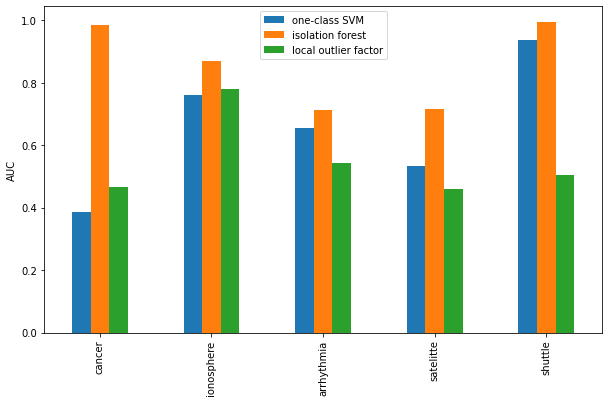

In [47]:
auc.plot.bar(figsize=(10,6), ylabel="AUC")

In [26]:
precision

,one-class SVM,isolation forest,local outlier factor
cancer,0.697933,0.977528,0.611650
ionosphere,0.710611,0.812261,0.776062
arrhythmia,0.821053,0.812641,0.811494
satelitte,0.728253,0.788991,0.693385
shuttle,0.986488,0.998958,0.940251


<AxesSubplot:ylabel='precision'>

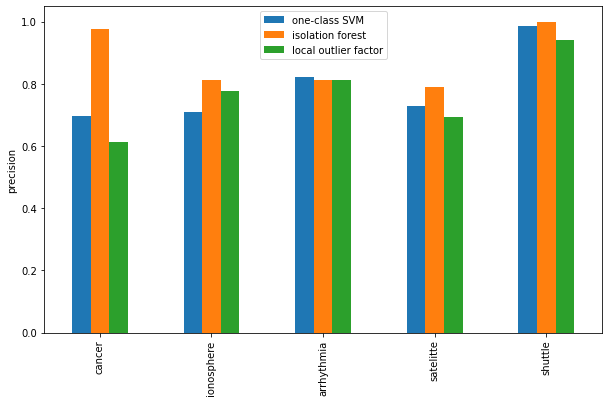

In [48]:
precision.plot.bar(figsize=(10,6), ylabel="precision")

In [49]:
recall

,one-class SVM,isolation forest,local outlier factor
cancer,0.958515,0.949782,0.825328
ionosphere,0.982222,0.942222,0.893333
arrhythmia,0.857143,0.989011,0.969780
satelitte,0.945946,0.952133,1.000000
shuttle,0.945296,0.938638,0.947915


<AxesSubplot:ylabel='recall'>

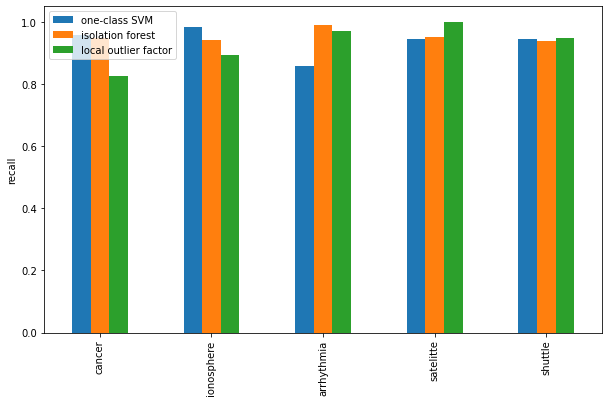

In [50]:
recall.plot.bar(figsize=(10,6), ylabel="recall")

In [28]:
f1score

,one-class SVM,isolation forest,local outlier factor
cancer,0.807728,0.963455,0.702602
ionosphere,0.824627,0.872428,0.830579
arrhythmia,0.838710,0.892193,0.883605
satelitte,0.822946,0.862919,0.818933
shuttle,0.965453,0.967859,0.944067


<AxesSubplot:ylabel='f1score'>

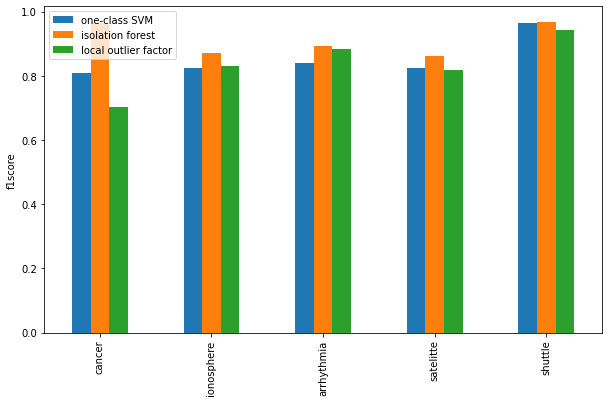

In [51]:
f1score.plot.bar(figsize=(10,6), ylabel="f1score")

As can be seen in the above tables and plots, the best performing method to detect outliers is Isolation Forest. For all datasets, it achieved the best accuracy, AUC, recall, precision and Fscore. Since the classes (outliers vs the rest of the observations) are unbalanced, analyzing only the accuracy can lead to incorrect interpretations. That is why I also introduce AUC, precision, recall and F-score. 

A bit better option (than accuracy) is the AUC metric which is threshold-invariant and does not care about how many positive and negative cases there are in the dataset. For $\textit{cacner}$ and $\textit{shuttle}$ datasets and Isolation Forest, the AUC is really high (almost 1) which means the outliers are detected accurately. On the other datasets, Isolation Forest also has an AUC value higher than 0.5, so we can expect it can detect outliers quite well. The AUC metric is reflected in the accuracy measure for Isolation Forest.

Local Outlier Factor usually performs rather poorly (apart from $\textit{ionosphere}$ dataset). The value of 0.5 means that the outlier detection is performed rather in a random manner or giving a constant label for each data point. 

One-class SVM, for some datasets performs similarly to Isolation Forest, but there are also datasets for which its AUC is around 0.5 ($\textit{cancer}$, $\textit{satelite}$).

All algorithms have a high recall, meaning they can detect positive cases (outliers) successfully. Looking at the precision suggests that some of the positive predictions are false. Combined results are visible on the f1score plot. 

An interesting thing can be seen for the Local Outlier Factor and $\textit{shuttle}$ dataset. The accuracy is really high and at the same time, AUC is around 0.5 meaning the outlier detection is not successful. 

To sum up, the best method to detect outliers is the Isolation Forest. The local Outlier Factor may work better for cases we want to identify outliers of a cluster (local area).